In [1]:
import pandas as pd

# Series 예제
s = pd.Series([10, 20, 30], index=["a", "b", "c"])
print("Series 예제:")
print(s)

# DataFrame 예제
data = {
    "이름": ["홍길동", "김철수", "이영희"],
    "나이": [25, 30, 22],
    "성별": ["남", "남", "여"]
}
df = pd.DataFrame(data)
print("\nDataFrame 예제:")
print(df)


Series 예제:
a    10
b    20
c    30
dtype: int64

DataFrame 예제:
    이름  나이 성별
0  홍길동  25  남
1  김철수  30  남
2  이영희  22  여


In [ ]:
# 시리즈 만들기
s1 = pd.Series({'a':1, 'b':5, 'c':3})
s2 = pd.Series([1, 5, 3], index=['a', 'b', 'c'])
s3 = pd.Series((1, 5, 3), index=['a', 'b', 'c'])
print("\n시리즈 s1:")
print(s1)
print("\n시리즈 s2:")
print(s2)
print("\n시리즈 s3:")
print(s3)


<Axes: >

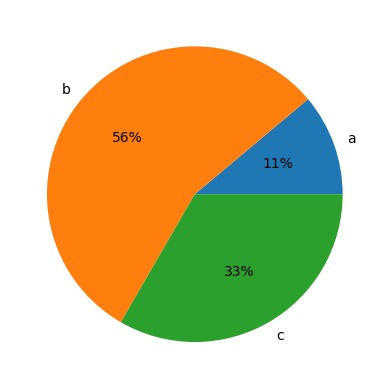

In [33]:
# s1.plot(kind='bar')  # 막대 그래프 그리기  빈도 또는 비교를 나타내는 데 유용합니다.
# s2.plot(kind='line')  # 선 그래프 그리기  변화량 또는 추세를 나타내는 데 유용합니다.
# 파이그래프에 확률 표시하기
s3.plot(kind='pie', autopct=lambda pct: f'{round(pct)}%')  # 파이 차트 그리기 비율을 나타내는 데 유용합니다.  - 통계

In [39]:
import pandas as pd
df = pd.read_csv('data.csv',encoding='cp949')
df.loc[1].values[2:]  # 1번째 행의 3번째 열부터 끝까지의 값을 가져옵니다.

array(['83,005', '75,536', '65,389', '58,074', '53,673', '47,445',
       '45,531', '42,602', '39,400', '41,600'], dtype=object)

In [59]:
df.loc[0].values[2:]

array(['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024'], dtype=object)

<Axes: >

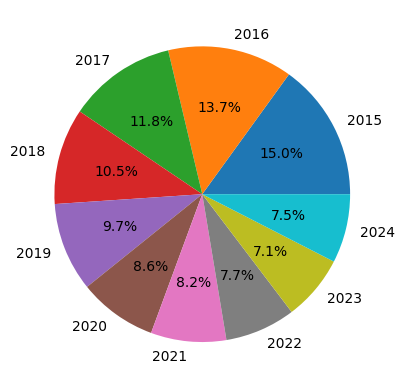

In [61]:
# 방법 1: 쉼표 제거 후 정수 변환
arr = df.loc[1].values[2:]  # 1번째 행의 3번째 열부터 끝까지의 값을 가져옵니다.
arr = pd.Series(arr).str.replace(',', '').astype(int)
arr.index = df.loc[0].values[2:]  # 0번째 행의 3번째 열부터 끝까지의 값을 인덱스로 사용합니다.
arr.plot(kind='pie', autopct='%1.1f%%')  # 파이 차트 그리기

In [64]:
# 데이터 가공 
data_path = '소상공인시_서울.csv'
df = pd.read_csv(data_path, encoding='cp949')
df.head()

,상호명,주소,업종대분류,업종중분류,업종소분류
0,허술한집,서울특별시 강서구 공항동 45-89,음식,분식,라면김밥분식
1,신풍유통,서울특별시 중구 봉래동2가 122,제조,식품가공/제조,종합식품제조
2,옛날한과,서울특별시 양천구 신월동 115-15,음식,제과제빵떡케익,떡/한과집
3,서울연인단팥빵본점,서울특별시 강남구 역삼동 707-9,제조,식품가공/제조,빵/과자제조-종합
4,엔젤,서울특별시 중구 황학동 706-2,음식,유흥주점,호프/맥주


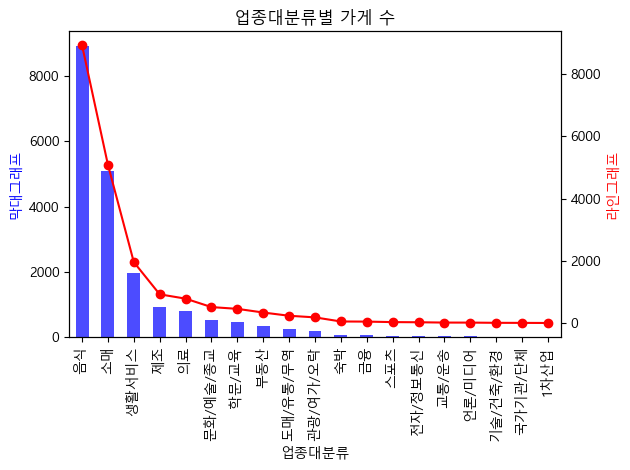

In [91]:
import matplotlib.pyplot as plt
# 방법 1: 두 번째 y축 사용
fig, ax1 = plt.subplots()

# 막대그래프 (기본 축)
df['업종대분류'].value_counts().plot(kind='bar', ax=ax1, alpha=0.7, color='blue')
ax1.set_ylabel('막대그래프', color='blue')

# 라인그래프 (같은 축)
ax2 = ax1.twinx()
df['업종대분류'].value_counts().plot(kind='line', ax=ax2, color='red', marker='o')
ax2.set_ylabel('라인그래프', color='red')

plt.title('업종대분류별 가게 수')
plt.xticks(rotation=45)
plt.tight_layout()

<Axes: xlabel='업종중분류'>

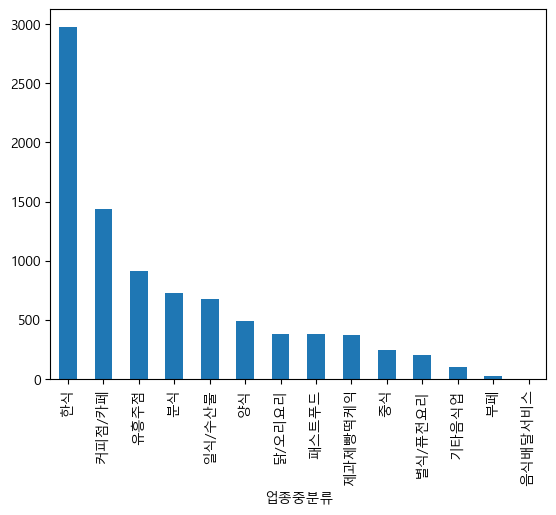

In [105]:
# 업종대분류 가 음식인 항목들중에 업종 중분류의 개수는?
# 1. 업중대분류가 음식인 항목들만 필터링
df2 = df[df['업종대분류'] == '음식']
df2['업종중분류'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

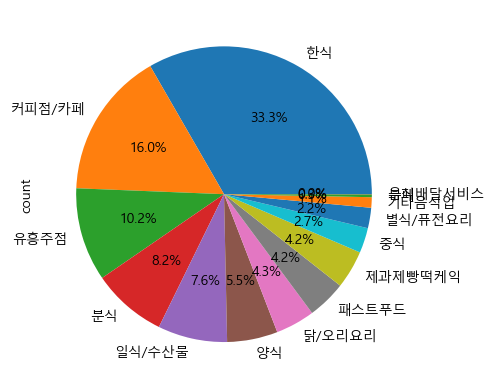

In [106]:
df2['업종중분류'].value_counts().plot(kind='pie', autopct='%1.1f%%')  # 파이 차트 그리기

<Axes: ylabel='count'>

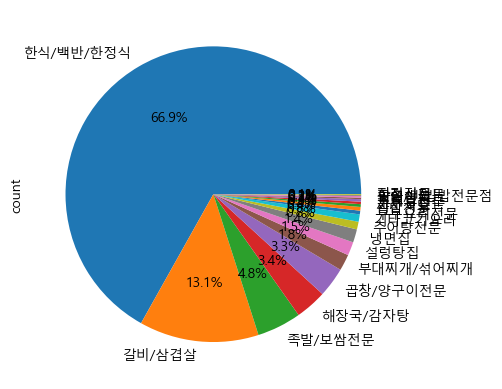

In [110]:
df3 = df2[df2['업종중분류'] =='한식']
df3['업종소분류'].value_counts().plot(kind='pie', autopct='%1.1f%%')  # 파이 차트 그리기

C:\Users\tj\AppData\Local\Temp\ipykernel_8572\2456163667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['구'] = df3['주소'].str.split(' ').str[1].values


<Axes: xlabel='구'>

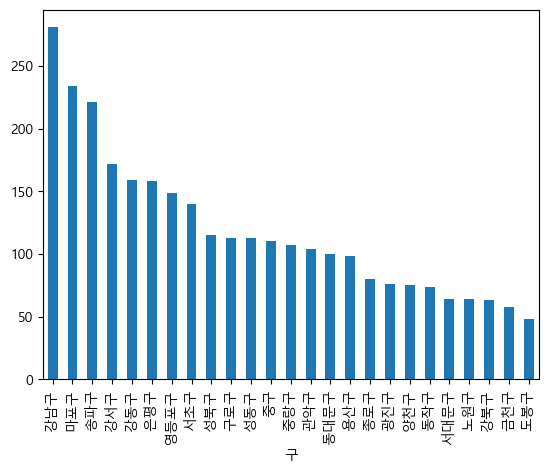

In [126]:
'서울특별시 중구 충무로1가 52-5'.split(' ')[1]
df3['구'] = df3['주소'].str.split(' ').str[1].values
df3['구'].value_counts().plot(kind='bar')

In [128]:
# 1. 소상공인 서울 csv데이터를 읽어서 데이터프레임에 저장하고 변수는 df
# df 변수를 이용해서 업종대분류의 개수를 카운트
# df 변수를 이용해서 업종대분류가 소매인 데이터를 df2에 저장
# df2 변수 업종중부류가 종합소매점인 데이터를 df3에 저장

In [131]:
import pandas as pd
df = pd.read_csv('소상공인시_서울.csv',encoding='cp949')
df.head(2)

,상호명,주소,업종대분류,업종중분류,업종소분류
0,허술한집,서울특별시 강서구 공항동 45-89,음식,분식,라면김밥분식
1,신풍유통,서울특별시 중구 봉래동2가 122,제조,식품가공/제조,종합식품제조


In [164]:
# 예제 1: 업종대분류별 가게 수
# print(df['업종대분류'].value_counts())
# 예제 2: 업종소분류별 상위 10개 업종
# print(df['업종소분류'].value_counts()[:3].index  )
# 예제 3: "음식" 업종 중 어떤 업종소분류가 가장 많을까?
# print(df[df['업종대분류'] == '음식']['업종소분류'].value_counts()[:5])
# 예제 4: 자치구별 가게 수 구하기
# df['자치구'] =  df['주소'].apply(lambda x : x.split(' ')[1] )
# print(df['자치구'].value_counts()[:5])
# 예제 5: 자치구별 '음식' 업종 수
# df[df['업종대분류'] == '음식']['자치구'].value_counts()[:5]
# 예제 6: 강남구에 있는 '라면김밥분식'만 보기
# df2 = df[df['자치구'] == '강남구']
# df2[df2['업종소분류'] == '라면김밥분식']
# 예제 7: '호프/맥주' 업소 상호명과 주소만 출력
# df[df['업종소분류'] =='호프/맥주'][ ['상호명','주소'] ]

,상호명,주소
4,엔젤,서울특별시 중구 황학동 706-2
54,찰리네맥주집,서울특별시 도봉구 쌍문동 248-2
75,치킨마루,서울특별시 강서구 마곡동 743
84,조은날,서울특별시 중랑구 묵동 294-54
298,크라스플러스,서울특별시 은평구 갈현동 505-4
...,...,...
21268,미쓰리,서울특별시 서대문구 미근동 198
21296,옛날산골통닭,서울특별시 중랑구 망우동 490-13
21303,비어탭세븐위례점,서울특별시 송파구 장지동 884
21369,주당클럽,서울특별시 강동구 성내동 381-25


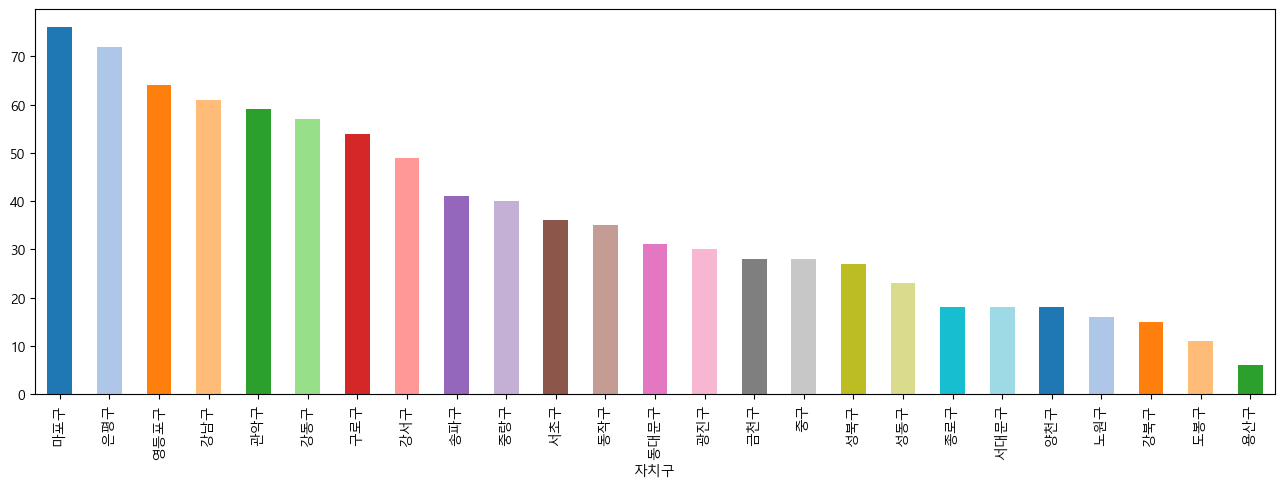

In [189]:
# 🧪 추가로 해볼만한 실습 과제
# ‘유흥주점’ 업종소분류의 자치구 분포를 구하고 시각화 해보세요.
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(16,5))

# 25개의 랜덤한 컬러 리스트
colors = plt.cm.tab20(np.linspace(0, 1, 20))  # 20개
df[df['업종중분류'] == '유흥주점']['자치구'].value_counts().plot(kind='bar',
                                                     color = colors)
plt.show()

In [197]:
# ‘스타벅스’의 상호명만 추출해서 리스트로 만들기
df[df['상호명'].apply(lambda x : '스타벅스' in x )]['상호명'].to_list()[:5]

['스타벅스서소문배재점', '스타벅스고대프라자점', '스타벅스방배카페입구점', '스타벅스역삼럭키점', '스타벅스송파방이DT점']

In [207]:
# 자치구별 상호 수 상위 5개 구만 막대그래프로 표시하기
# df['자치구'].value_counts()[:5].plot(kind='bar')
# plt.show()
# ‘중구’에 있는 모든 업종을 업종소분류 기준으로 정렬해서 보여주세요.
df[df['자치구'] == '중구'].sort_values(by='업종소분류')

,상호명,주소,업종대분류,업종중분류,업종소분류,자치구
11439,이에스그룹9사업단,서울특별시 중구 쌍림동 146-7,도매/유통/무역,가공식품도매,가공식품도매-기타,중구
15047,한국광고골드라인,서울특별시 중구 인현동2가 192-3,제조,문구/잡화제조,간판프레임제작,중구
2365,엉터리생고기,서울특별시 중구 서소문동 102,음식,한식,갈비/삼겹살,중구
18861,우촌생고기,서울특별시 중구 저동2가 8-2,음식,한식,갈비/삼겹살,중구
7786,남우촌이동숯불갈비,서울특별시 중구 남창동 48-8,음식,한식,갈비/삼겹살,중구
...,...,...,...,...,...,...
21010,에어리코리아,서울특별시 중구 신당동 775,NaN,NaN,NaN,중구
21020,스노우맨,서울특별시 중구 남산동2가 15-24,NaN,NaN,NaN,중구
21120,저친,서울특별시 중구 광희동1가 187-1,NaN,NaN,NaN,중구
21234,씨제이올리브네트웍스순,서울특별시 중구 순화동 151,NaN,NaN,NaN,중구


In [209]:
# 결측치
# 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21391 entries, 0 to 21390
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호명     21391 non-null  object
 1   주소      21391 non-null  object
 2   업종대분류   19622 non-null  object
 3   업종중분류   19622 non-null  object
 4   업종소분류   19622 non-null  object
 5   자치구     21391 non-null  object
dtypes: object(6)
memory usage: 1002.8+ KB


In [211]:
clean_df = df.dropna()

In [212]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19622 entries, 0 to 21389
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호명     19622 non-null  object
 1   주소      19622 non-null  object
 2   업종대분류   19622 non-null  object
 3   업종중분류   19622 non-null  object
 4   업종소분류   19622 non-null  object
 5   자치구     19622 non-null  object
dtypes: object(6)
memory usage: 1.0+ MB


In [213]:
import numpy as np
list_1 = [1,2,3,4,5]
list_2 = [1,2,3,4,5]
list_1 + list_2

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [215]:
list_1 > 3

TypeError: '>' not supported between instances of 'list' and 'int'

In [214]:
np_1 = np.array([1,2,3,4,5])
np_2 = np.array([1,2,3,4,5])
np_1 + np_2

array([ 2,  4,  6,  8, 10])

In [218]:
np_1[np_1 > 3]

array([4, 5])

In [221]:
list_1 = [
    [1,2,3],
    [4,5,6]
]
list_1[1,1]

TypeError: list indices must be integers or slices, not tuple

In [227]:
np_1 = np.array(
  [
    [1,2,3,4,5],
    [4,5,6,7,8],
    [14,15,16,17,18],
    [24,25,26,27,28]
 ]
)
np_1[1:3,1]

array([ 5, 15])

In [228]:
np_1.shape

(4, 5)

In [230]:
np_1.reshape(2,-1)

array([[ 1,  2,  3,  4,  5,  4,  5,  6,  7,  8],
       [14, 15, 16, 17, 18, 24, 25, 26, 27, 28]])

In [234]:
np_1.reshape(-1 , 5)

array([[ 1,  2,  3,  4,  5],
       [ 4,  5,  6,  7,  8],
       [14, 15, 16, 17, 18],
       [24, 25, 26, 27, 28]])

In [235]:
np_1

array([[ 1,  2,  3,  4,  5],
       [ 4,  5,  6,  7,  8],
       [14, 15, 16, 17, 18],
       [24, 25, 26, 27, 28]])

In [240]:
np_2 = np.array([ 4,  5,  6,  7,8])
np_2

array([4, 5, 6, 7, 8])

In [241]:
np_1 + np_2   # (4,5) + (5,)   

array([[ 5,  7,  9, 11, 13],
       [ 8, 10, 12, 14, 16],
       [18, 20, 22, 24, 26],
       [28, 30, 32, 34, 36]])

In [246]:
np_3 = np.array([1,2,3,4]).reshape(-1,1)
np_3

array([[1],
       [2],
       [3],
       [4]])

In [247]:
np_1 + np_3

array([[ 2,  3,  4,  5,  6],
       [ 6,  7,  8,  9, 10],
       [17, 18, 19, 20, 21],
       [28, 29, 30, 31, 32]])

In [248]:
np_1

array([[ 1,  2,  3,  4,  5],
       [ 4,  5,  6,  7,  8],
       [14, 15, 16, 17, 18],
       [24, 25, 26, 27, 28]])

In [262]:
import random
a = np.array(random.sample(range(100),20)).reshape(4,5)
b = np.array(random.sample(range(100),10)).reshape(5,2)

In [263]:
a

array([[82, 59, 34, 95, 40],
       [49, 32, 19, 55, 11],
       [ 2, 36, 80, 41,  9],
       [26, 73, 21,  5, 16]])

In [264]:
b

array([[61, 23],
       [79, 26],
       [21, 78],
       [96, 48],
       [34, 18]])

In [265]:
a.dot(b)

array([[20857, 11352],
       [11570,  6279],
       [ 8888,  9352],
       [ 8818,  4662]])

In [267]:
a.shape, b.shape

((4, 5), (5, 2))

In [ ]:
# 로또 번호 생성기
# 로또가 뭔가?
# 로또 번호는 어떻게 구성되어 있는가(데이터 범위)


# 로또 번호 생성기
파이썬에서 동작하는 1~45 중 6개 번호를 중복 없이 무작위로 뽑아 정렬해서 출력하는 예제입니다.

In [268]:
import random

def generate_lotto_numbers():
    numbers = random.sample(range(1, 46), 6)
    numbers.sort()
    return numbers

print("이번 주 로또 번호:", generate_lotto_numbers())

이번 주 로또 번호: [3, 7, 10, 20, 23, 32]


In [273]:
lotto = pd.read_csv('lotto.csv',header=2)

In [276]:
lotto_number = lotto.loc[ : ,'1':'6' ]

In [278]:
lotto_number.values

array([[ 5,  6, 11, 27, 43, 44],
       [ 3,  7, 15, 16, 19, 43],
       [ 7,  9, 11, 21, 30, 35],
       ...,
       [ 2, 19, 25, 26, 27, 43],
       [13, 14, 22, 27, 30, 38],
       [ 2, 16, 19, 31, 34, 35]], shape=(578, 6))

In [279]:
result = []
for i in [[1,2],[2,3],[3,4]]:
    result += i


In [283]:
lotto_lists = []
for i in lotto_number.values.tolist():
    lotto_lists += i

lotto_lists[:5]

[5, 6, 11, 27, 43]

In [286]:
pd.Series(lotto_lists).value_counts()[:5]

12    92
21    92
33    91
38    90
7     89
Name: count, dtype: int64

## 1. 가중치 추출 방식
로또 번호의 출현 빈도를 기반으로, 자주 나온 번호가 더 잘 뽑히도록 가중치를 부여해 6개 번호를 추출합니다.

## 2. 패턴 기반 추출 방식
예시: 최근 10회차에 등장하지 않은 번호 중에서 6개를 무작위로 추출합니다.

In [297]:
import numpy as np
from collections import Counter

# 1. 가중치 추출 방식: 출현 빈도 기반
lotto_counts = Counter(lotto_lists)
nums = np.arange(1, 46)
weights = np.array([lotto_counts.get(n, 0) for n in nums])

# 가중치가 0인 경우 최소값(1)로 보정
weights = weights + 1

# 6개 번호를 가중치에 따라 무작위 추출 (중복 없이)
weighted_numbers = np.random.choice(nums, size=6, replace=False, p=weights/weights.sum())
weighted_numbers.sort()
print("가중치 기반 로또 번호:", weighted_numbers)

가중치 기반 로또 번호: [ 4  9 11 35 37 43]


## 2. 패턴 기반 추출 방식
예시: 최근 10회차에 등장하지 않은 번호 중에서 6개를 무작위로 추출합니다.

In [304]:
# 최근 10회차에 등장하지 않은 번호 중 6개 추출
recent_10 = lotto_number.values[-10:].flatten()
recent_10_set = set(recent_10)
all_numbers = set(range(1, 46))
not_recent = list(all_numbers - recent_10_set)

if len(not_recent) >= 6:
    pattern_numbers = np.random.choice(not_recent, size=6, replace=False)
    pattern_numbers.sort()
    print("패턴 기반(최근 10회 미출현) 로또 번호:", pattern_numbers)
else:
    print("최근 10회 미출현 번호가 6개 미만입니다.")

패턴 기반(최근 10회 미출현) 로또 번호: [ 3 17 29 32 37 45]


In [308]:
lotto_number.columns

Index(['1', '2', '3', '4', '5', '6'], dtype='object')

In [309]:
!pip install scipy

   ---------------------------------------- 0.0/38.4 MB ? eta -:--:--
   --------- ------------------------------ 8.7/38.4 MB 43.1 MB/s eta 0:00:01
   ----------------------- ---------------- 22.5/38.4 MB 55.7 MB/s eta 0:00:01
   -------------------------------------- - 36.7/38.4 MB 59.8 MB/s eta 0:00:01
   ---------------------------------------- 38.4/38.4 MB 50.4 MB/s eta 0:00:00


=== 로또 번호 통계 분석 및 예측 시스템 ===

데이터 정보:
- 총 회차: 578
- 컬럼 수: 6
- 컬럼명: ['1', '2', '3', '4', '5', '6']
- 최근 3회차 데이터:
      1   2   3   4   5   6
575   2  19  25  26  27  43
576  13  14  22  27  30  38
577   2  16  19  31  34  35

총 578회차 데이터 분석
총 3468개 번호 데이터
1. 빈도 분석 결과:
    번호  출현횟수      출현확률
28  12    92  0.026528
12  21    92  0.026528
34  33    91  0.026240
32  38    90  0.025952
7    7    89  0.025663
24  18    88  0.025375
1    6    88  0.025375
9   16    87  0.025087
10  19    86  0.024798
40  45    85  0.024510

2. 최근 추세 분석 결과:
   번호  최근출현횟수    최근출현확률
0   2       6  0.050000
1  16       4  0.033333
2  17       2  0.016667
3  32       1  0.008333
4  39       6  0.050000
5  45       2  0.016667
6   6       4  0.033333
7   8       7  0.058333
8  13       3  0.025000
9  30       3  0.025000

3. 패턴 분석 결과:
평균 연속번호 개수: 0.68
평균 합계: 138.30

4. 예측 번호 (5세트):
1. 통계 기반 예측: [2, 6, 18, 27, 33, 39]
2. 최근 추세 기반 예측: [np.int64(6), 19, 27, 34, 39, np.int64(45)]
3. 결핍 번호 기반 예측: [3, 12, 15, 17, 32, 45]


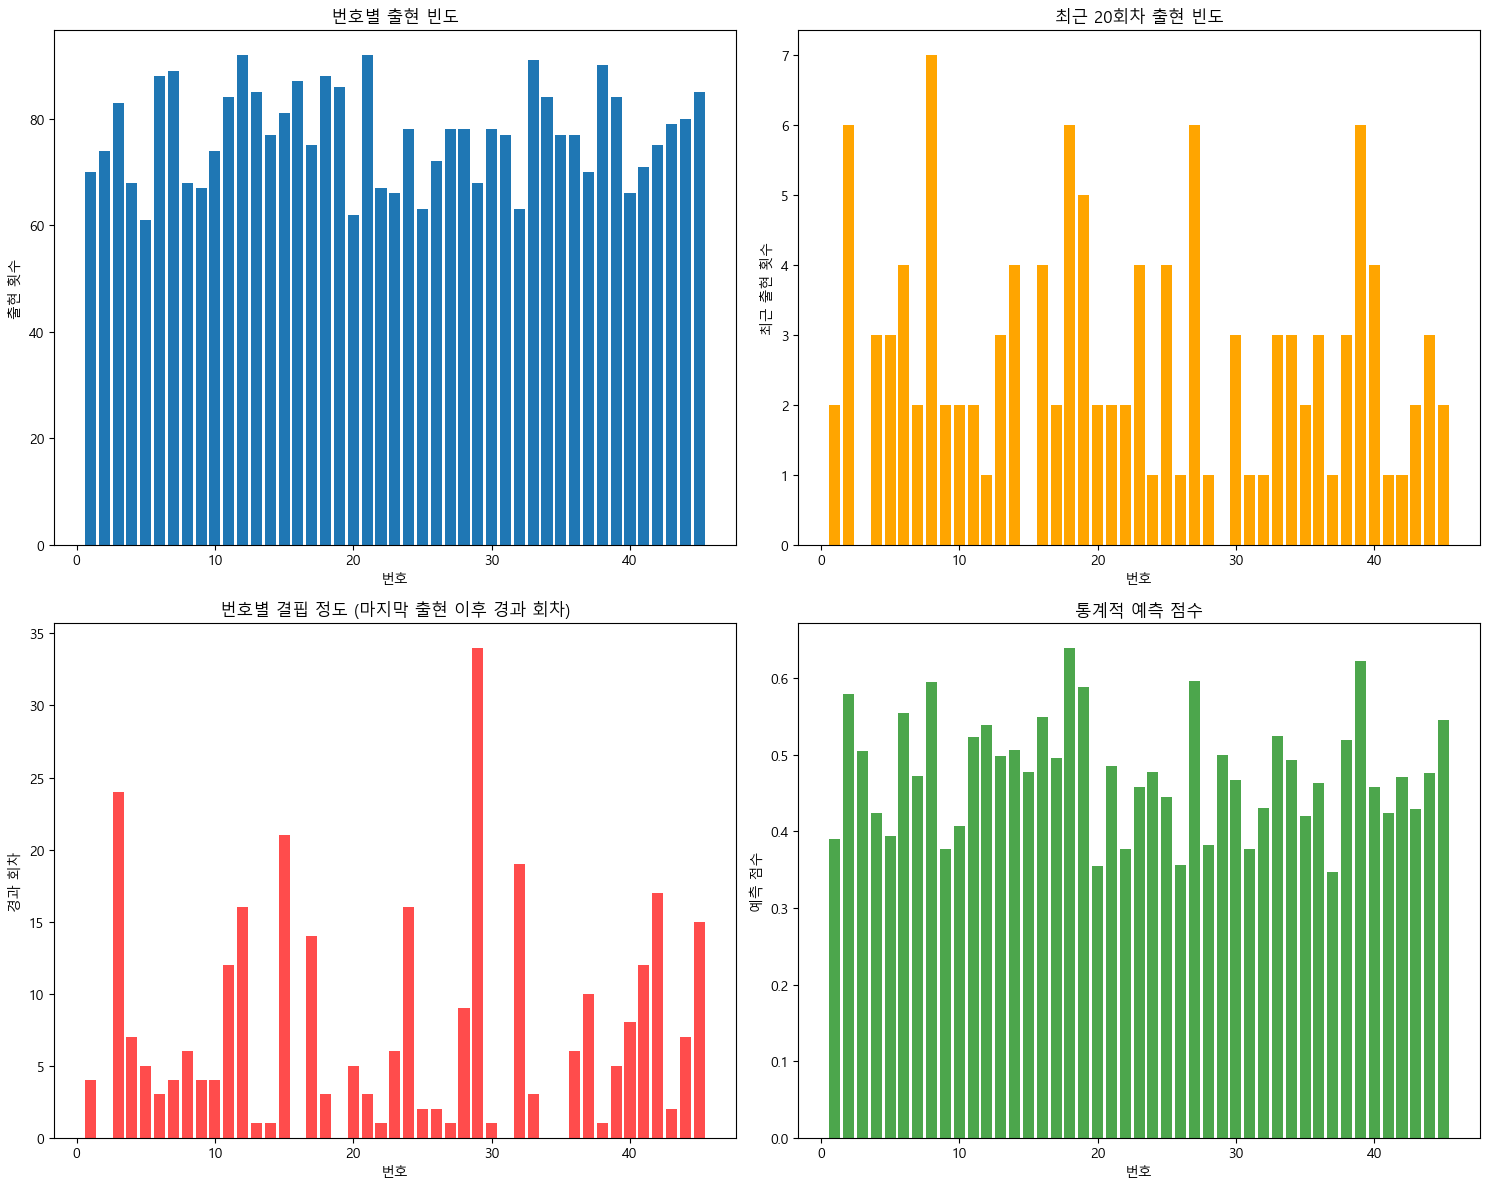


=== 분석 완료 ===
※ 주의: 로또는 완전한 확률 게임입니다.
※ 이 예측은 통계적 분석에 기반한 것이며, 당첨을 보장하지 않습니다.
※ 책임감 있는 구매를 권장합니다.

=== 실제 사용법 ===
# 실제 lotto_number 데이터프레임이 있는 경우:
# analyzer = LottoAnalyzer(lotto_number)
# predictions = analyzer.generate_predictions(5)
# analyzer.visualize_analysis()
# 
# 위 주석을 해제하고 실행하면 실제 578회차 데이터로 분석됩니다.


In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

class LottoAnalyzer:
    def __init__(self, df):
        """
        로또 데이터 분석기 초기화
        df: 각 회차별 당첨번호 6개가 포함된 데이터프레임 (1번~6번 컬럼)
        """
        self.df = df.copy()
        self.numbers = list(range(1, 46))  # 로또 번호 1-45
        self.prepare_data()
        
    def prepare_data(self):
        """데이터 전처리"""
        # 모든 당첨번호를 하나의 리스트로 변환
        self.all_numbers = []
        for idx, row in self.df.iterrows():
            # 6개 번호 모두 추출
            numbers = [int(x) for x in row.values if pd.notna(x)]
            self.all_numbers.extend(numbers)
        
        print(f"총 {len(self.df)}회차 데이터 분석")
        print(f"총 {len(self.all_numbers)}개 번호 데이터")
    
    def frequency_analysis(self):
        """번호별 출현 빈도 분석"""
        self.frequency = Counter(self.all_numbers)
        
        # 빈도 데이터프레임 생성
        freq_df = pd.DataFrame(list(self.frequency.items()), 
                              columns=['번호', '출현횟수'])
        freq_df = freq_df.sort_values('출현횟수', ascending=False)
        freq_df['출현확률'] = freq_df['출현횟수'] / len(self.all_numbers)
        
        return freq_df
    
    def recent_trend_analysis(self, recent_draws=20):
        """최근 추세 분석"""
        recent_data = self.df.tail(recent_draws)
        recent_numbers = []
        
        for idx, row in recent_data.iterrows():
            numbers = [int(x) for x in row.values if pd.notna(x)]
            recent_numbers.extend(numbers)
        
        recent_freq = Counter(recent_numbers)
        
        # 최근 빈도 데이터프레임
        recent_df = pd.DataFrame(list(recent_freq.items()), 
                                columns=['번호', '최근출현횟수'])
        recent_df['최근출현확률'] = recent_df['최근출현횟수'] / len(recent_numbers)
        
        return recent_df
    
    def pattern_analysis(self):
        """패턴 분석"""
        patterns = {
            '연속번호': [],
            '홀짝비율': [],
            '구간분포': [],
            '합계': []
        }
        
        for idx, row in self.df.iterrows():
            numbers = sorted([int(x) for x in row.values if pd.notna(x)])
            
            # 연속번호 개수
            consecutive = 0
            for i in range(len(numbers)-1):
                if numbers[i+1] - numbers[i] == 1:
                    consecutive += 1
            patterns['연속번호'].append(consecutive)
            
            # 홀짝 비율
            odd_count = sum(1 for n in numbers if n % 2 == 1)
            patterns['홀짝비율'].append(f"{odd_count}:{6-odd_count}")
            
            # 구간 분포 (1-15, 16-30, 31-45)
            section1 = sum(1 for n in numbers if 1 <= n <= 15)
            section2 = sum(1 for n in numbers if 16 <= n <= 30)
            section3 = sum(1 for n in numbers if 31 <= n <= 45)
            patterns['구간분포'].append(f"{section1}:{section2}:{section3}")
            
            # 합계
            patterns['합계'].append(sum(numbers))
        
        return patterns
    
    def statistical_prediction(self):
        """통계적 예측"""
        # 1. 빈도 분석
        freq_df = self.frequency_analysis()
        
        # 2. 최근 추세 분석
        recent_df = self.recent_trend_analysis()
        
        # 3. 종합 점수 계산
        prediction_scores = {}
        
        for num in self.numbers:
            score = 0
            
            # 전체 빈도 점수 (가중치 0.4)
            if num in self.frequency:
                freq_score = self.frequency[num] / max(self.frequency.values())
                score += freq_score * 0.4
            
            # 최근 빈도 점수 (가중치 0.3)
            recent_freq = recent_df[recent_df['번호'] == num]['최근출현횟수'].values
            if len(recent_freq) > 0:
                recent_score = recent_freq[0] / recent_df['최근출현횟수'].max()
                score += recent_score * 0.3
            
            # 결핍 점수 (오랫동안 안 나온 번호, 가중치 0.3)
            last_appearance = self.get_last_appearance(num)
            if last_appearance > 10:  # 10회차 이상 안 나온 경우
                deprivation_score = min(last_appearance / 50, 1.0)  # 최대 50회차로 정규화
                score += deprivation_score * 0.3
            
            prediction_scores[num] = score
        
        return prediction_scores
    
    def get_last_appearance(self, number):
        """특정 번호의 마지막 출현 이후 경과 회차"""
        for i in range(len(self.df)-1, -1, -1):
            row = self.df.iloc[i]
            numbers = [int(x) for x in row.values if pd.notna(x)]
            if number in numbers:
                return len(self.df) - 1 - i
        return len(self.df)
    
    def generate_predictions(self, num_sets=5):
        """예측 번호 생성"""
        prediction_scores = self.statistical_prediction()
        patterns = self.pattern_analysis()
        
        predictions = []
        
        for set_num in range(num_sets):
            # 다양한 전략으로 번호 선택
            if set_num == 0:
                # 전략 1: 순수 통계 기반
                selected = self.select_by_scores(prediction_scores)
            elif set_num == 1:
                # 전략 2: 최근 추세 + 통계
                selected = self.select_recent_trend_based()
            elif set_num == 2:
                # 전략 3: 결핍 번호 중심
                selected = self.select_deprivation_based()
            elif set_num == 3:
                # 전략 4: 패턴 기반
                selected = self.select_pattern_based(patterns)
            else:
                # 전략 5: 균형 잡힌 선택
                selected = self.select_balanced()
            
            predictions.append(sorted(selected))
        
        return predictions
    
    def select_by_scores(self, scores):
        """점수 기반 선택"""
        sorted_numbers = sorted(scores.items(), key=lambda x: x[1], reverse=True)
        top_candidates = [num for num, score in sorted_numbers[:12]]
        
        # 상위 후보 중에서 랜덤하게 6개 선택
        selected = np.random.choice(top_candidates, 6, replace=False)
        return selected.tolist()
    
    def select_recent_trend_based(self):
        """최근 추세 기반 선택"""
        recent_df = self.recent_trend_analysis(recent_draws=10)
        hot_numbers = recent_df.nlargest(8, '최근출현횟수')['번호'].tolist()
        
        # 핫넘버 중 4개 + 랜덤 2개
        selected = np.random.choice(hot_numbers, min(4, len(hot_numbers)), replace=False).tolist()
        
        remaining_numbers = [n for n in self.numbers if n not in selected]
        selected.extend(np.random.choice(remaining_numbers, 6-len(selected), replace=False))
        
        return selected
    
    def select_deprivation_based(self):
        """결핍 번호 기반 선택"""
        deprivation_scores = {}
        for num in self.numbers:
            deprivation_scores[num] = self.get_last_appearance(num)
        
        # 오랫동안 안 나온 번호들 중에서 선택
        sorted_deprivation = sorted(deprivation_scores.items(), key=lambda x: x[1], reverse=True)
        cold_numbers = [num for num, days in sorted_deprivation[:10]]
        
        selected = np.random.choice(cold_numbers, 6, replace=False)
        return selected.tolist()
    
    def select_pattern_based(self, patterns):
        """패턴 기반 선택"""
        # 가장 일반적인 홀짝 비율 찾기
        odd_even_counter = Counter(patterns['홀짝비율'])
        most_common_ratio = odd_even_counter.most_common(1)[0][0]
        target_odd = int(most_common_ratio.split(':')[0])
        
        # 홀수/짝수 분리
        odd_numbers = [n for n in self.numbers if n % 2 == 1]
        even_numbers = [n for n in self.numbers if n % 2 == 0]
        
        # 목표 비율로 선택
        selected_odd = np.random.choice(odd_numbers, target_odd, replace=False)
        selected_even = np.random.choice(even_numbers, 6-target_odd, replace=False)
        
        selected = np.concatenate([selected_odd, selected_even])
        return selected.tolist()
    
    def select_balanced(self):
        """균형 잡힌 선택"""
        # 각 구간에서 균등하게 선택
        section1 = list(range(1, 16))
        section2 = list(range(16, 31))
        section3 = list(range(31, 46))
        
        selected = []
        selected.extend(np.random.choice(section1, 2, replace=False))
        selected.extend(np.random.choice(section2, 2, replace=False))
        selected.extend(np.random.choice(section3, 2, replace=False))
        
        return selected
    
    def visualize_analysis(self):
        """분석 결과 시각화"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # 1. 번호별 출현 빈도
        freq_df = self.frequency_analysis()
        axes[0, 0].bar(freq_df['번호'], freq_df['출현횟수'])
        axes[0, 0].set_title('번호별 출현 빈도')
        axes[0, 0].set_xlabel('번호')
        axes[0, 0].set_ylabel('출현 횟수')
        
        # 2. 최근 추세
        recent_df = self.recent_trend_analysis()
        axes[0, 1].bar(recent_df['번호'], recent_df['최근출현횟수'], color='orange')
        axes[0, 1].set_title('최근 20회차 출현 빈도')
        axes[0, 1].set_xlabel('번호')
        axes[0, 1].set_ylabel('최근 출현 횟수')
        
        # 3. 번호별 결핍 정도
        deprivation_data = {num: self.get_last_appearance(num) for num in self.numbers}
        axes[1, 0].bar(deprivation_data.keys(), deprivation_data.values(), color='red', alpha=0.7)
        axes[1, 0].set_title('번호별 결핍 정도 (마지막 출현 이후 경과 회차)')
        axes[1, 0].set_xlabel('번호')
        axes[1, 0].set_ylabel('경과 회차')
        
        # 4. 예측 점수
        prediction_scores = self.statistical_prediction()
        axes[1, 1].bar(prediction_scores.keys(), prediction_scores.values(), color='green', alpha=0.7)
        axes[1, 1].set_title('통계적 예측 점수')
        axes[1, 1].set_xlabel('번호')
        axes[1, 1].set_ylabel('예측 점수')
        
        plt.tight_layout()
        plt.show()

# 사용 예제 (실제 데이터로 교체 필요)
def create_sample_data():
    """샘플 데이터 생성 (실제 로또 데이터로 교체 필요)"""
    np.random.seed(42)
    sample_data = []
    
    for i in range(100):  # 100회차 샘플
        # 1-45 중에서 6개 번호 선택 (중복 없음)
        numbers = sorted(np.random.choice(range(1, 46), 6, replace=False))
        sample_data.append(numbers)
    
    columns = ['1', '2', '3', '4', '5', '6']
    return pd.DataFrame(sample_data, columns=columns)

# 실행 예제
if __name__ == "__main__":
    # 실제 데이터 사용
    print("=== 로또 번호 통계 분석 및 예측 시스템 ===\n")
    
    # lotto_number 데이터프레임 사용 (578회차, 컬럼: '1', '2', '3', '4', '5', '6')
    lotto_data = lotto_number  # 실제 실행시 이 줄 사용
    
    # 데모용 샘플 데이터 (실제로는 위 줄 사용)
    # lotto_data = create_sample_data()
    
    print(f"데이터 정보:")
    print(f"- 총 회차: {lotto_data.shape[0]}")
    print(f"- 컬럼 수: {lotto_data.shape[1]}")
    print(f"- 컬럼명: {list(lotto_data.columns)}")
    print(f"- 최근 3회차 데이터:")
    print(lotto_data.tail(3))
    print()
    
    # 분석기 생성
    analyzer = LottoAnalyzer(lotto_data)
    
    # 분석 수행
    print("1. 빈도 분석 결과:")
    freq_df = analyzer.frequency_analysis()
    print(freq_df.head(10))
    
    print("\n2. 최근 추세 분석 결과:")
    recent_df = analyzer.recent_trend_analysis()
    print(recent_df.head(10))
    
    print("\n3. 패턴 분석 결과:")
    patterns = analyzer.pattern_analysis()
    print(f"평균 연속번호 개수: {np.mean(patterns['연속번호']):.2f}")
    print(f"평균 합계: {np.mean(patterns['합계']):.2f}")
    
    # 예측 번호 생성
    print("\n4. 예측 번호 (5세트):")
    predictions = analyzer.generate_predictions(5)
    
    strategies = [
        "통계 기반 예측",
        "최근 추세 기반 예측", 
        "결핍 번호 기반 예측",
        "패턴 기반 예측",
        "균형 잡힌 예측"
    ]
    
    for i, (strategy, numbers) in enumerate(zip(strategies, predictions)):
        print(f"{i+1}. {strategy}: {numbers}")
    
    # 시각화
    print("\n5. 분석 결과 시각화 중...")
    analyzer.visualize_analysis()
    
    print("\n=== 분석 완료 ===")
    print("※ 주의: 로또는 완전한 확률 게임입니다.")
    print("※ 이 예측은 통계적 분석에 기반한 것이며, 당첨을 보장하지 않습니다.")
    print("※ 책임감 있는 구매를 권장합니다.")
    
    print("\n=== 실제 사용법 ===")
    print("# 실제 lotto_number 데이터프레임이 있는 경우:")
    print("# analyzer = LottoAnalyzer(lotto_number)")
    print("# predictions = analyzer.generate_predictions(5)")
    print("# analyzer.visualize_analysis()")
    print("# ")
    print("# 위 주석을 해제하고 실행하면 실제 578회차 데이터로 분석됩니다.")

총 578회차 데이터 분석
총 3468개 번호 데이터
예측 1: [ 2  6  8 11 19 45]
예측 2: [ 2  8 14 19 23 31]
예측 3: [ 3 11 15 17 29 42]
예측 4: [ 2  7 12 15 18 19]
예측 5: [ 6 12 22 24 36 45]


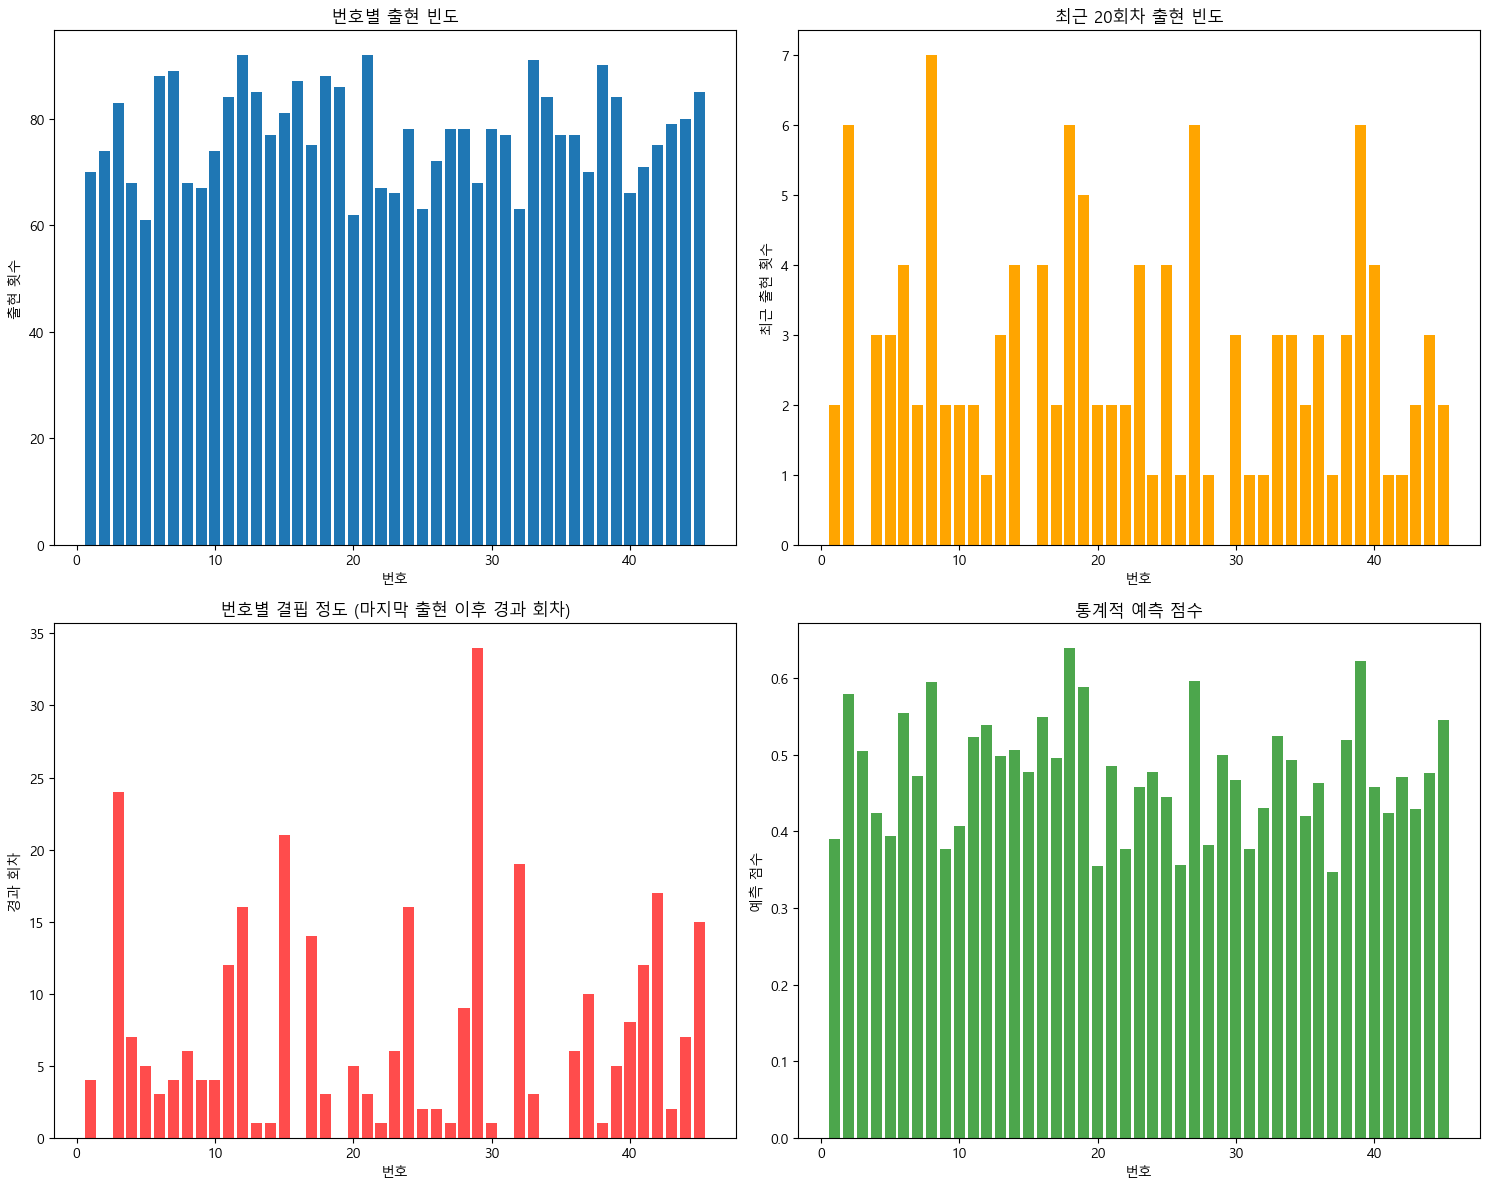

In [324]:
# 1. 분석기 생성
analyzer = LottoAnalyzer(lotto_number)

# 2. 예측 번호 생성 (5세트)
predictions = analyzer.generate_predictions(5)

# 3. 결과 출력
for i, numbers in enumerate(predictions):
    print(f"예측 {i+1}: {np.array(numbers).astype(int)}")

# 4. 시각화
analyzer.visualize_analysis()

In [317]:
int(13)

13